<a href="https://colab.research.google.com/github/Avanish023/Machine-learning-data--science/blob/master/lbinaryclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score,recall_score,precision_score, confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC



In [2]:
###### reading dataset
data=pd.read_csv("//content/Dataset (1).csv")
pincodes=pd.read_csv("//content//pincodes.csv")#####external dataset
covid_data=pd.read_csv("//content//covid.csv")

In [3]:
#####basic eda

In [4]:
data.describe()

,id,pin_code,down_payment,loan_int_rate,tenure,loan_amount,birth_year,bureau_credit_score,moratorium_optin
count,15000.00000,15000.000000,14954.000000,15000.000000,15000.000000,15000.000000,15000.000000,14589.000000,15000.000000
mean,9109.69580,468939.833800,277.244148,38.262135,43.636933,14718.962401,1988.788000,595.416547,0.234267
std,5278.55478,203155.744075,2019.157606,3.027804,4.659975,25690.265686,7.498142,222.771374,0.423554
min,1.00000,110001.000000,0.000000,2.000000,39.000000,295.531800,1954.000000,300.000000,0.000000
25%,4522.25000,331951.500000,0.000000,38.000000,39.000000,4739.040000,1985.000000,300.000000,0.000000
50%,9113.50000,500050.000000,0.000000,38.240000,42.000000,7898.400000,1990.000000,704.000000,0.000000
75%,13678.25000,591103.500000,0.000000,38.240000,49.000000,13822.200000,1994.000000,783.000000,0.000000
max,18267.00000,855113.000000,43223.994000,58.000000,75.000000,296190.000000,2002.000000,900.000000,1.000000


In [5]:
data.shape

(15000, 13)

In [6]:
data.isna().sum()

id                       0
pin_code                 0
down_payment            46
loan_int_rate            0
tenure                   0
loan_amount              0
sector                   0
mandate_source         281
gender                   1
city                     0
birth_year               0
bureau_credit_score    411
moratorium_optin         0
dtype: int64

In [7]:
##### finding unique values in each column
for i in data.columns:
  print(i, len(data[i].unique()))

id 15000
pin_code 5593
down_payment 185
loan_int_rate 22
tenure 13
loan_amount 3969
sector 7
mandate_source 6
gender 3
city 1325
birth_year 49
bureau_credit_score 404
moratorium_optin 2


In [8]:
##### filling up the missing values 
#### for catagorical with mode and for numerical with
data['down_payment'].fillna(data['down_payment'].mean(),inplace=True)
data['bureau_credit_score'].fillna(data['bureau_credit_score'].mean(),inplace=True)
data['mandate_source'].fillna(data['mandate_source'].mode(),inplace=True)

In [9]:
######## univariate analysis

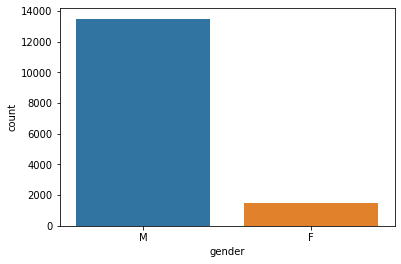

In [10]:
sns.countplot(data=data,x='gender')

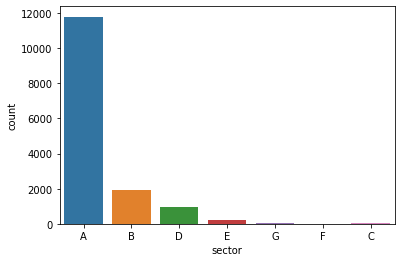

In [11]:
sns.countplot(data=data,x='sector')

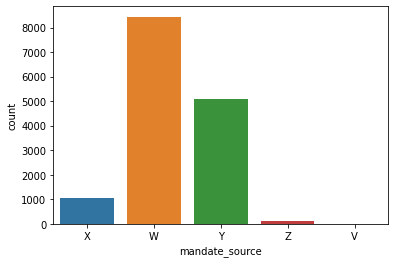

In [12]:
sns.countplot(data=data,x='mandate_source')


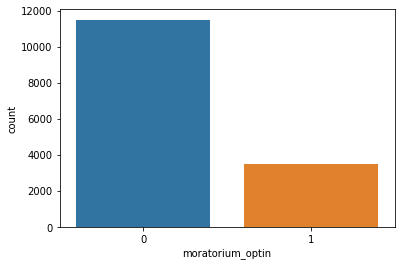

In [13]:

sns.countplot(data=data,x='moratorium_optin')


In [14]:
##### there more than 5000 pincodes and 1500 cites , will create some extra features based on the external data sets

In [15]:
pincodes=pincodes[['Pincode','State']]
pincodes.rename(columns={'Pincode':'pin_code'},inplace=True)
pincodes=pincodes.drop_duplicates(subset=['pin_code'])
data=pd.merge(data,pincodes,on='pin_code',how='left')
print(data.shape)

(15000, 14)


In [16]:
#####creating age,zones columns, interest and emi
data['age']=2022-data['birth_year']
data['zones']=data['pin_code'].astype(str).str[0]
data['amount_got']=data['loan_amount']-data['down_payment']
data['amount_repaid']=data['loan_amount']*pow((1+data['loan_int_rate']/100),(data['tenure']/12))
data['intrest_paid']=data['amount_repaid']-data['loan_amount']
data['emi']=data['amount_repaid']/data['tenure']

In [17]:
###### adding state wise total cases and deaths till date

In [18]:
covid_data=covid_data.groupby('State').sum().reset_index()


In [19]:
data=pd.merge(data,covid_data,on="State",how='left')

In [20]:
data.drop(columns=['pin_code','birth_year','id'],axis=1, inplace=True)

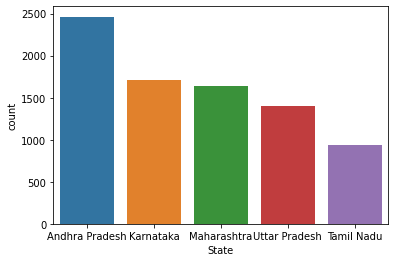

In [21]:
sns.countplot(data=data,x='State',order=data.State.value_counts().iloc[:5].index)

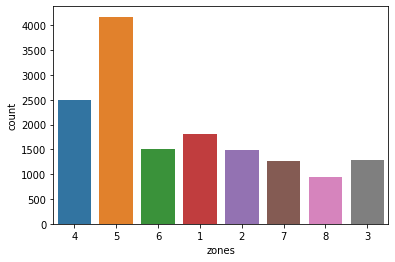

In [22]:
sns.countplot(data=data,x='zones')

In [23]:
data.head()

,down_payment,loan_int_rate,tenure,loan_amount,sector,mandate_source,gender,city,bureau_credit_score,moratorium_optin,State,age,zones,amount_got,amount_repaid,intrest_paid,emi,Total Cases,Deaths
0,0.0,38.24,42,5265.6000,A,X,M,PNE,735.0,0,Maharashtra,35,4,5265.6000,16355.578240,11089.978240,389.418530,8136274.0,148409.0
1,0.0,38.24,39,8556.6000,A,W,M,HUB,775.0,0,Karnataka,40,5,8556.6000,24510.989107,15954.389107,628.486900,4071630.0,40307.0
2,0.0,38.24,39,9873.0000,A,W,M,STA,770.0,1,Madhya Pradesh,32,4,9873.0000,28281.910508,18408.910508,725.177193,1054913.0,10776.0
3,0.0,38.00,49,25520.3886,A,Y,M,COC,300.0,0,Kerala,52,6,25520.3886,95073.661362,69553.272762,1940.278803,6827441.0,71527.0
4,0.0,38.24,39,7898.4000,A,W,M,PPT,300.0,0,Haryana,29,1,7898.4000,22625.528406,14727.128406,580.141754,1056560.0,10714.0


In [24]:
data['Deaths'].fillna(data['Deaths'].mean(),inplace=True)
data['Total Cases'].fillna(data['Total Cases'].mean(),inplace=True)

In [25]:
data_boxplot=data[['down_payment', 'loan_int_rate', 'tenure', 'loan_amount','bureau_credit_score','age','Deaths','Total Cases','amount_got','amount_repaid','intrest_paid','emi']]

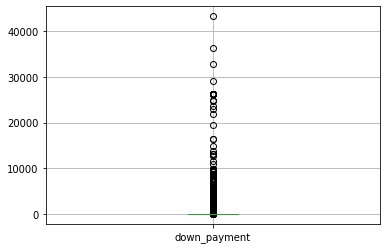

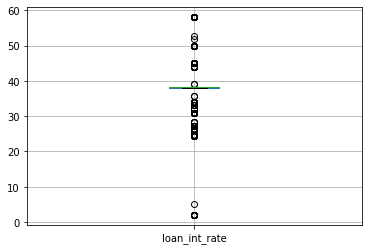

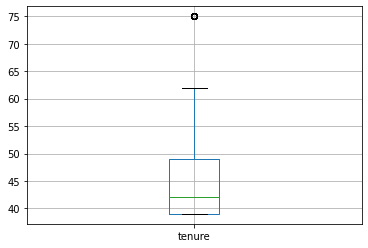

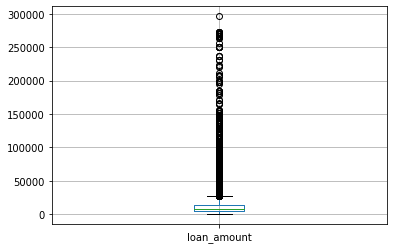

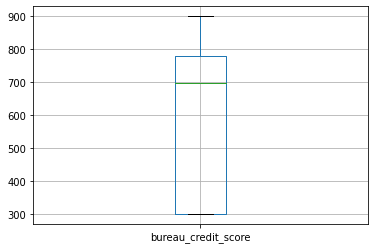

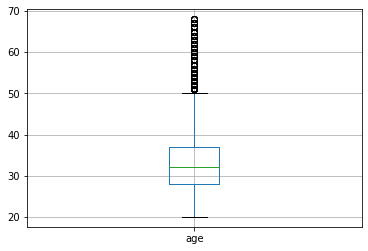

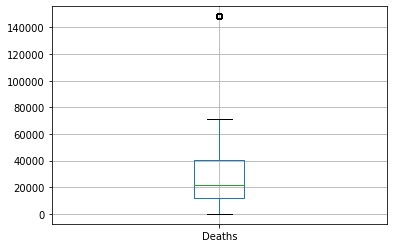

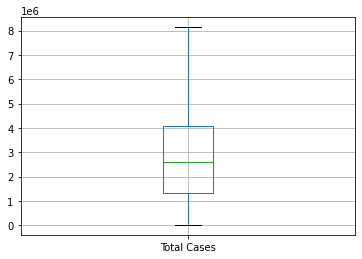

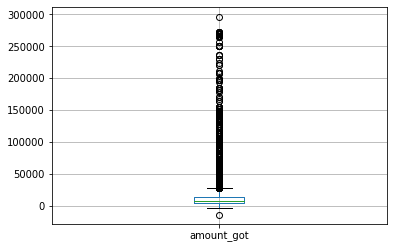

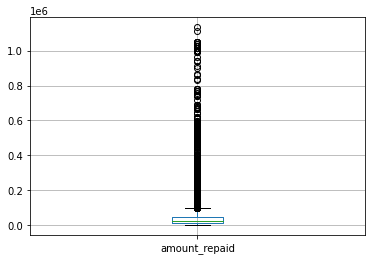

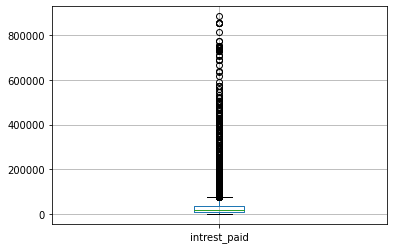

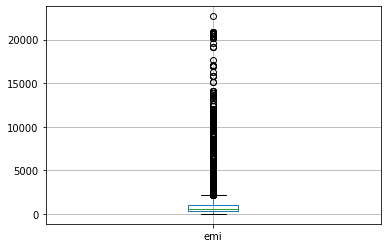

In [26]:
for column in data_boxplot:
    plt.figure()
    data_boxplot.boxplot([column])

In [27]:
#######insights from univariate analysis
#### More than 85 % are male 
#### A sector contibutes to 80% of data
#### W and Y are the main mandate source contributes to 90% of data
##### 23% of people opted for montrium
#### Data has Andra pradesh as highest no of records
#### loan intrest rate, age and tennure,emi  have outlier they might needs to be treated
#### credit score and tennure does not have any outlier



In [28]:
######### treating outliers 
lower_limit = data["down_payment"].quantile(0.03)  
upper_limit = data["down_payment"].quantile(0.97)
data["down_payment"] = np.where(data["down_payment"]> upper_limit, upper_limit,np.where(data["down_payment"]< lower_limit, lower_limit,
                        data["down_payment"]))
lower_limit = data["loan_int_rate"].quantile(0.03)  
upper_limit = data["loan_int_rate"].quantile(0.97)
data["loan_int_rate"] = np.where(data["loan_int_rate"]> upper_limit, upper_limit,np.where(data["loan_int_rate"]< lower_limit, lower_limit,
                        data["loan_int_rate"]))
lower_limit = data["loan_amount"].quantile(0.03)  
upper_limit = data["loan_amount"].quantile(0.97)
data["age"] = np.where(data["age"]> upper_limit, upper_limit,np.where(data["age"]< lower_limit, lower_limit,
                        data["age"]))
lower_limit = data["loan_amount"].quantile(0.03)  
upper_limit = data["loan_amount"].quantile(0.97)
data["loan_amount"] = np.where(data["loan_amount"]> upper_limit, upper_limit,np.where(data["loan_amount"]< lower_limit, lower_limit,
                        data["loan_amount"]))
lower_limit = data["Total Cases"].quantile(0.03)  
upper_limit = data["Total Cases"].quantile(0.97)
data["Total Cases"] = np.where(data["Total Cases"]> upper_limit, upper_limit,np.where(data["Total Cases"]< lower_limit, lower_limit,
                        data["Total Cases"]))
lower_limit = data["Deaths"].quantile(0.03)  
upper_limit = data["Deaths"].quantile(0.97)
data["Deaths"] = np.where(data["Deaths"]> upper_limit, upper_limit,np.where(data["Deaths"]< lower_limit, lower_limit,
                        data["Deaths"]))
lower_limit = data["emi"].quantile(0.03)  
upper_limit = data["emi"].quantile(0.97)
data["emi"] = np.where(data["emi"]> upper_limit, upper_limit,np.where(data["emi"]< lower_limit, lower_limit,
                        data["emi"]))
lower_limit = data["intrest_paid"].quantile(0.03)  
upper_limit = data["intrest_paid"].quantile(0.97)
data["intrest_paid"] = np.where(data["intrest_paid"]> upper_limit, upper_limit,np.where(data["intrest_paid"]< lower_limit, lower_limit,
                        data["intrest_paid"]))
lower_limit = data["amount_repaid"].quantile(0.03)  
upper_limit = data["amount_repaid"].quantile(0.97)
data["amount_repaid"] = np.where(data["amount_repaid"]> upper_limit, upper_limit,np.where(data["amount_repaid"]< lower_limit, lower_limit,
                        data["amount_repaid"]))
lower_limit = data["amount_got"].quantile(0.03)  
upper_limit = data["amount_got"].quantile(0.97)
data["amount_got"] = np.where(data["amount_got"]> upper_limit, upper_limit,np.where(data["amount_got"]< lower_limit, lower_limit,
                        data["amount_got"]))








In [29]:
##### bivariate  and multivariate analysis analyis

In [30]:
data.head()

,down_payment,loan_int_rate,tenure,loan_amount,sector,mandate_source,gender,city,bureau_credit_score,moratorium_optin,State,age,zones,amount_got,amount_repaid,intrest_paid,emi,Total Cases,Deaths
0,0.0,38.24,42,5265.6000,A,X,M,PNE,735.0,0,Maharashtra,855.66,4,5265.6000,16355.578240,11089.978240,389.418530,8136274.0,148409.0
1,0.0,38.24,39,8556.6000,A,W,M,HUB,775.0,0,Karnataka,855.66,5,8556.6000,24510.989107,15954.389107,628.486900,4071630.0,40307.0
2,0.0,38.24,39,9873.0000,A,W,M,STA,770.0,1,Madhya Pradesh,855.66,4,9873.0000,28281.910508,18408.910508,725.177193,1054913.0,10776.0
3,0.0,38.00,49,25520.3886,A,Y,M,COC,300.0,0,Kerala,855.66,6,25520.3886,95073.661362,69553.272762,1940.278803,6827441.0,71527.0
4,0.0,38.24,39,7898.4000,A,W,M,PPT,300.0,0,Haryana,855.66,1,7898.4000,22625.528406,14727.128406,580.141754,1056560.0,10714.0


In [31]:
#### numerical variables
data.groupby('moratorium_optin').agg('mean')[['down_payment', 'loan_int_rate', 'tenure', 'loan_amount','bureau_credit_score','age','Total Cases','Deaths',"emi","amount_got","amount_repaid","intrest_paid"]]

,down_payment,loan_int_rate,tenure,loan_amount,bureau_credit_score,age,Total Cases,Deaths,emi,amount_got,amount_repaid,intrest_paid
moratorium_optin,,,,,,,,,,,,
0,103.863738,38.350235,43.495647,13501.855729,594.906244,855.66,3.112779e+06,37462.128280,1004.405661,13238.650753,45965.498451,32604.623335
1,20.865914,38.417075,44.098748,10047.880912,597.084542,855.66,3.200727e+06,39161.573129,756.390900,9994.590449,34518.676744,24459.893802


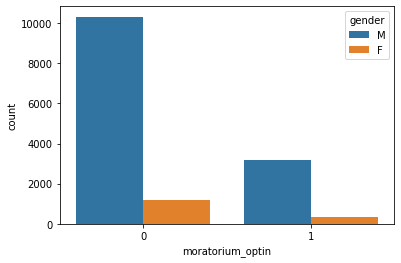

In [32]:
sns.countplot(data=data,x='moratorium_optin',hue='gender')

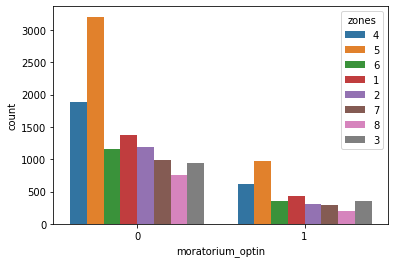

In [33]:
sns.countplot(data=data,x='moratorium_optin',hue='zones')

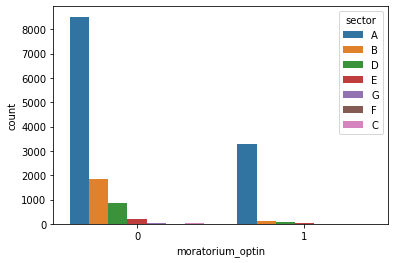

In [34]:
sns.countplot(data=data,x='moratorium_optin',hue='sector')

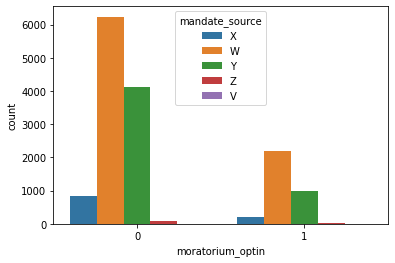

In [35]:
sns.countplot(data=data,x='moratorium_optin',hue='mandate_source')

In [36]:
####### state wise analysis

In [37]:
pt=pd.crosstab(data['State'],data['moratorium_optin']).reset_index()
pt.columns=['State', '0', '1']
pt['motatorium_rate']=(pt['1']/(pt['0']+pt['1']))*100
pt.sort_values(['motatorium_rate'],ascending=False,inplace=True)

In [38]:
pt['state_group']=np.where(pt['motatorium_rate']>25,"H",np.where(pt['motatorium_rate']<15,"L","M"))

In [39]:
pt

,State,0,1,motatorium_rate,state_group
9,Daman & Diu,3,3,50.000000,H
5,Chandigarh,59,29,32.954545,H
12,Gujarat,437,191,30.414013,H
11,Goa,102,44,30.136986,H
34,Uttaranchal,65,28,30.107527,H
30,Sikkim,7,3,30.000000,H
32,Tripura,17,7,29.166667,H
2,Arunachal Pradesh,11,4,26.666667,H
35,West Bengal,472,171,26.594090,H
28,Punjab,178,64,26.446281,H


In [40]:
pt=pt[['State','state_group']]

In [41]:
####### city wise analysis

In [42]:
ct=pd.crosstab(data['city'],data['moratorium_optin']).reset_index()
ct.columns=['city', '0', '1']
ct['motatorium_rate']=(ct['1']/(ct['0']+ct['1']))*100
ct.sort_values(['motatorium_rate'],ascending=False,inplace=True)
ct['city_group']=np.where(ct['motatorium_rate']>75,"H",np.where(ct['motatorium_rate']<25,"L","M"))


In [43]:
ct

,city,0,1,motatorium_rate,city_group
854,NMH,0,1,100.0,H
640,KRIA,0,1,100.0,H
1198,THIA,0,1,100.0,H
180,BNWR,0,2,100.0,H
96,BAAP,0,1,100.0,H
...,...,...,...,...,...
362,EDA,1,0,0.0,L
841,NHK,1,0,0.0,L
360,Doddakannalli,1,0,0.0,L
843,NIC,1,0,0.0,L


In [44]:
ct=ct[['city','city_group']]

In [45]:
data.head()

,down_payment,loan_int_rate,tenure,loan_amount,sector,mandate_source,gender,city,bureau_credit_score,moratorium_optin,State,age,zones,amount_got,amount_repaid,intrest_paid,emi,Total Cases,Deaths
0,0.0,38.24,42,5265.6000,A,X,M,PNE,735.0,0,Maharashtra,855.66,4,5265.6000,16355.578240,11089.978240,389.418530,8136274.0,148409.0
1,0.0,38.24,39,8556.6000,A,W,M,HUB,775.0,0,Karnataka,855.66,5,8556.6000,24510.989107,15954.389107,628.486900,4071630.0,40307.0
2,0.0,38.24,39,9873.0000,A,W,M,STA,770.0,1,Madhya Pradesh,855.66,4,9873.0000,28281.910508,18408.910508,725.177193,1054913.0,10776.0
3,0.0,38.00,49,25520.3886,A,Y,M,COC,300.0,0,Kerala,855.66,6,25520.3886,95073.661362,69553.272762,1940.278803,6827441.0,71527.0
4,0.0,38.24,39,7898.4000,A,W,M,PPT,300.0,0,Haryana,855.66,1,7898.4000,22625.528406,14727.128406,580.141754,1056560.0,10714.0


In [46]:
data=pd.merge(data,pt,on="State",how="left")
data=pd.merge(data,ct,on="city",how="left")

In [47]:
data_boxplot.corr()


,down_payment,loan_int_rate,tenure,loan_amount,bureau_credit_score,age,Deaths,Total Cases,amount_got,amount_repaid,intrest_paid,emi
down_payment,1.000000,-0.092116,0.081642,0.250590,0.028499,0.084013,0.008219,0.017707,0.175042,0.235782,0.229282,0.251385
loan_int_rate,-0.092116,1.000000,-0.054459,-0.149744,0.004620,0.007308,-0.031419,-0.025501,-0.144939,-0.091876,-0.070610,-0.069787
tenure,0.081642,-0.054459,1.000000,0.416080,0.001719,0.117339,0.050445,0.064158,0.416642,0.450653,0.460836,0.402910
loan_amount,0.250590,-0.149744,0.416080,1.000000,0.049021,0.108890,0.026012,0.038069,0.997011,0.989787,0.981180,0.989040
bureau_credit_score,0.028499,0.004620,0.001719,0.049021,1.000000,0.062512,0.004299,0.010171,0.047580,0.048325,0.047834,0.048942
age,0.084013,0.007308,0.117339,0.108890,0.062512,1.000000,0.046804,0.059029,0.104037,0.107634,0.106645,0.113355
Deaths,0.008219,-0.031419,0.050445,0.026012,0.004299,0.046804,1.000000,0.929928,0.025798,0.024140,0.023346,0.023289
Total Cases,0.017707,-0.025501,0.064158,0.038069,0.010171,0.059029,0.929928,1.000000,0.037303,0.036316,0.035505,0.036009
amount_got,0.175042,-0.144939,0.416642,0.997011,0.047580,0.104037,0.025798,0.037303,1.000000,0.987806,0.979571,0.985801
amount_repaid,0.235782,-0.091876,0.450653,0.989787,0.048325,0.107634,0.024140,0.036316,0.987806,1.000000,0.998685,0.991860


In [48]:
####### Insights from bivariate and multivariate analysis
##### numerical values are uncorelated, only deaths and cases
##### there is aprrox 400% and 35% change in average values of down payment and loan amount for who has opted motatorium and who has not
######### more than 85% of people opted motatorium have opted sector A
#### there are few states with people 50% of motatorium rate on an average is around 20%


In [49]:
#### dropping city will try to include if we are not getting proper accuracies 
data.drop(columns=['city',"State","Deaths","emi","amount_got","amount_repaid","intrest_paid"], inplace=True)

In [50]:
############## data prepartion and model building

In [51]:
X = data.drop(columns=['moratorium_optin'],axis=1)
y = data['moratorium_optin']

In [52]:
X.columns

Index(['down_payment', 'loan_int_rate', 'tenure', 'loan_amount', 'sector',
       'mandate_source', 'gender', 'bureau_credit_score', 'age', 'zones',
       'Total Cases', 'state_group', 'city_group'],
      dtype='object')

In [53]:
########## getting dummy variables
X=pd.get_dummies(X,drop_first=True)


In [54]:
##### standarizing numerical variables 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
x_scaled = pd.DataFrame(x_scaled)
x_scaled.columns=X.columns

In [55]:
########## train_test_split in python
X_train, X_test,y_train, y_test = train_test_split(x_scaled,y ,
                                   random_state=104, 
                                   test_size=0.25, 
                                   shuffle=True)

In [56]:
########### rfe and logistic regression python

In [57]:
#### logisctic regression model
classifier = LogisticRegression(random_state=0,penalty= 'l2')
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [58]:
######## predicting on first data
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test,y_pred)
results = pd.DataFrame([['Logistic Regression', acc,prec,rec,f1]],columns=['Model', 'Accuracy', 'Precision', 'Recall','F1 Score'])
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.771467,0.692308,0.070628,0.128179


Test Data Accuracy: 0.7715


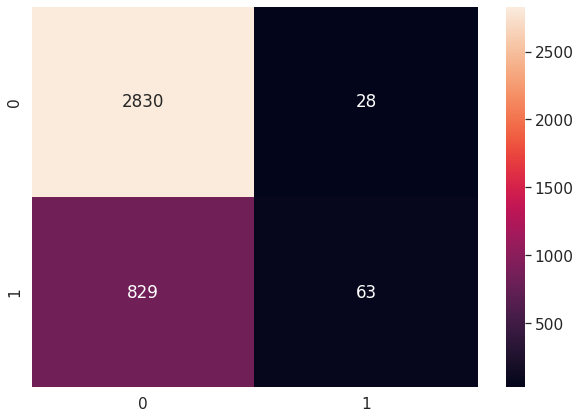

In [59]:
##### confusion matrix
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred)) 

In [60]:
########### recursive feature selection

In [61]:
rfe = RFE(classifier, n_features_to_select= None)
rfe = rfe.fit(X_train, y_train)


In [62]:
#Summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)
X_train.columns[rfe.support_]

[ True  True  True  True False False False  True  True  True  True False
  True False  True  True False False False False False False False False
 False  True False  True  True]
[ 1  1  1  1 13 16  6  1  1  1  1 10  1 12  1  1 14 11  5  9  7  8  4  2
  3  1 15  1  1]


Index(['down_payment', 'loan_int_rate', 'tenure', 'loan_amount', 'sector_B',
       'sector_C', 'sector_D', 'sector_E', 'sector_G', 'mandate_source_X',
       'mandate_source_Y', 'state_group_L', 'city_group_L', 'city_group_M'],
      dtype='object')

In [63]:
# Reitting Model to the Training Set
classifier = LogisticRegression(random_state=0, penalty= 'l2')
classifier.fit(X_train[X_train.columns[rfe.support_]], y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test[X_train.columns[rfe.support_]])
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Logistic Regression RFE (Lasso)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.771467,0.692308,0.070628,0.128179
1,Logistic Regression RFE (Lasso),0.772533,0.975610,0.044843,0.085745


In [64]:
########### random forest

In [65]:
rf = RandomForestClassifier(n_estimators = 3000, random_state = 42,max_features=5)
# Train the model on training data
rf.fit(X_train, y_train);

In [66]:
y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['RandomForrest', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.771467,0.692308,0.070628,0.128179
1,Logistic Regression RFE (Lasso),0.772533,0.975610,0.044843,0.085745
2,RandomForrest,0.749333,0.451807,0.252242,0.323741


Test Data Accuracy: 0.7493


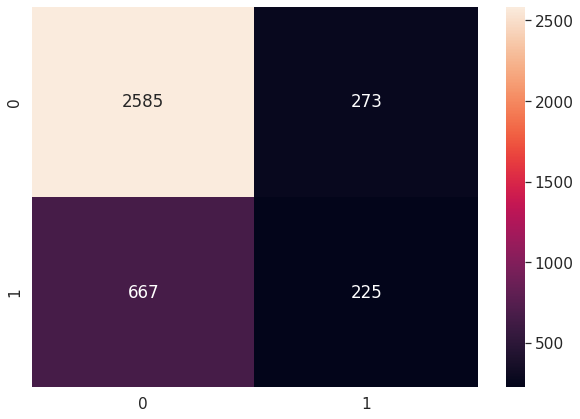

In [67]:
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred)) 

In [68]:
X_train.columns

Index(['down_payment', 'loan_int_rate', 'tenure', 'loan_amount',
       'bureau_credit_score', 'age', 'Total Cases', 'sector_B', 'sector_C',
       'sector_D', 'sector_E', 'sector_F', 'sector_G', 'mandate_source_W',
       'mandate_source_X', 'mandate_source_Y', 'mandate_source_Z', 'gender_M',
       'zones_2', 'zones_3', 'zones_4', 'zones_5', 'zones_6', 'zones_7',
       'zones_8', 'state_group_L', 'state_group_M', 'city_group_L',
       'city_group_M'],
      dtype='object')

In [79]:
############### trying svms
svms = svm.SVC(kernel = 'linear')
svms.fit(X_train, y_train)

SVC(kernel='linear')

In [80]:
y_pred = svms.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['SVM', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])


In [81]:
model_results


,Model,Accuracy,Precision,Recall,F1 Score
0,SVM,0.772533,0.97561,0.044843,0.085745
